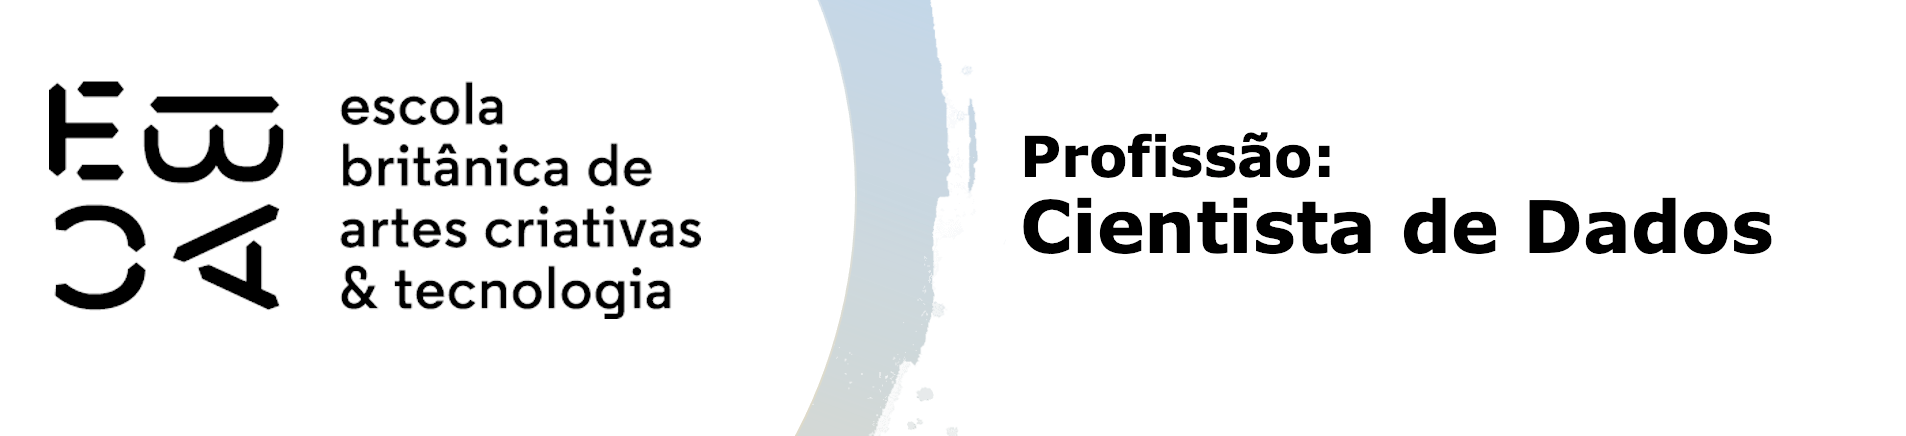

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# 1. Selecione as variáveis quantitativas da base de pinguins

peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number')

In [3]:
# 2. Elimine valores faltantes

peng_num = peng_num.dropna()
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [4]:
# 3. Padronize as variáveis para média zero e desvio padrão 1

padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [5]:
# 4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

clus = AgglomerativeClustering(
    linkage = "complete", 
    distance_threshold = None, 
    n_clusters=3,
    compute_distances=True
)

# treinando o modelo
_ = clus.fit(peng_pad)

# adicionando o número dos grupos do Dataframe original
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [6]:
# Função para criar um dendrograma a partir do resultado do AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

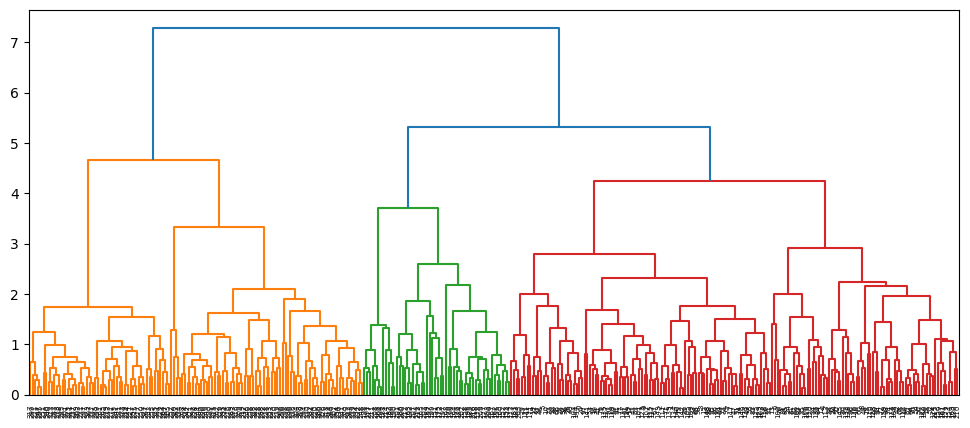

In [7]:
# 5. Faça o Dendrograma

plt.figure(figsize=(12, 5))
plot_dendrogram(clus)

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

**Quantidade pinguins de cada espécie em cada grupo**

In [8]:
df = peng.merge(peng_num['grupo'], how='left', on='id')
pd.crosstab(df['species'], df['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


**Descreva as variáveis quantitativas de cada grupo**

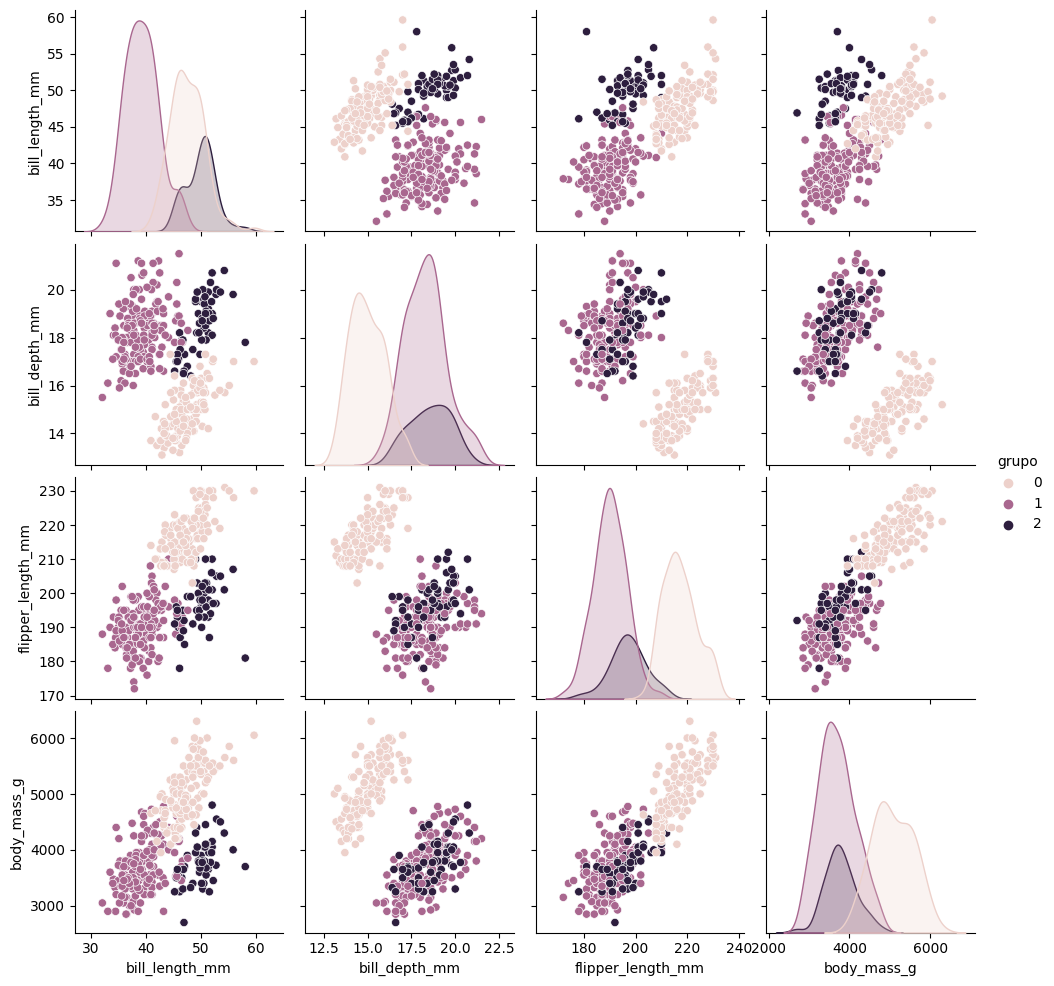

In [9]:
sns.pairplot(data=peng_num, hue='grupo');

<div style="background-color: #eafce3; padding: 8px 5px 8px 5px;">


No gráfico acima, podemos ver o relacionamento entre as variáveis quantitativas e os grupos. Podemos verificar que não ocorre uma distinção clara dos grupos quando comparamos a massa corporal (body_mass_g) com o comprimento e largura do bico (bill_length_mm e bill_depth_mm). Esse fato também ocorre quando comparamos o comprimento da nadadeira com a largura do bico (flipper_length_mm x bill_depth_mm)
    
</div>

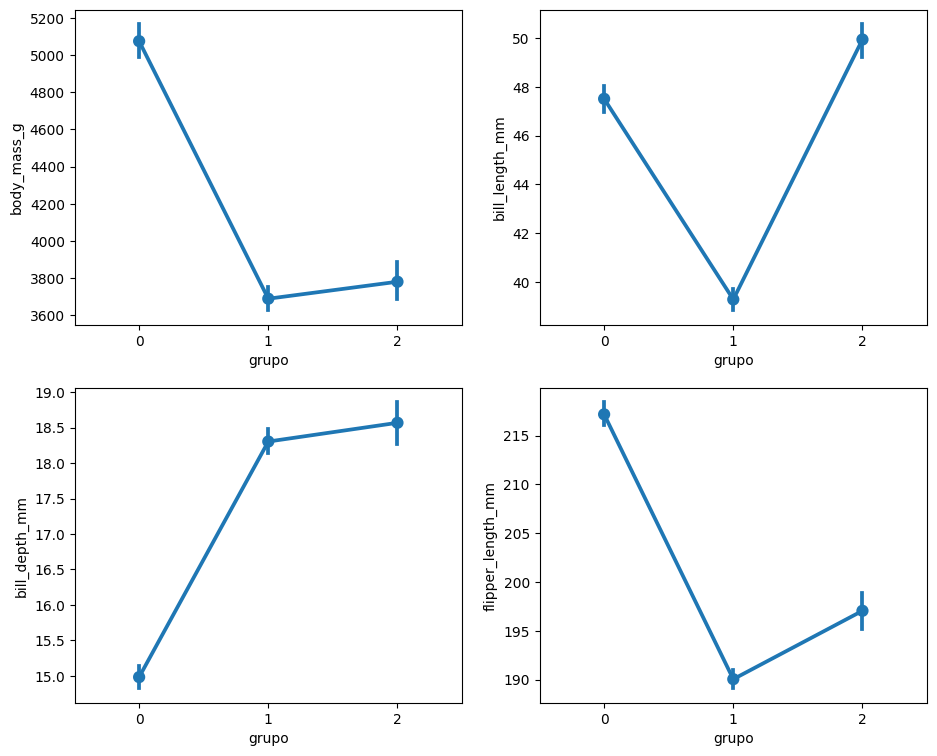

In [48]:
def grafico_perfil_medias(base):
    fig, ax = plt.subplots(2, 2, figsize=(11, 9))
    sns.pointplot(data=base, ax=ax[0][0], x="grupo", y="body_mass_g", estimator='mean')
    sns.pointplot(data=base, ax=ax[0][1], x="grupo", y="bill_length_mm", estimator='mean')
    sns.pointplot(data=base, ax=ax[1][0], x="grupo", y="bill_depth_mm", estimator='mean')
    sns.pointplot(data=base, ax=ax[1][1], x="grupo", y="flipper_length_mm", estimator='mean')
    plt.show()
    
grafico_perfil_medias(peng_num)

<div style="background-color: #eafce3; padding: 8px 5px 8px 5px;">


O gráfico acima apresenta o perfil das médias das variáveis quantitativas, com um intervalo de confiança de 95%. Podemos observar que os grupos 1 e 2 se confundem quanto a massa corporal e profundidade do bico.
    
</div>

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

**Agrupamento hierárquico com 5 grupos.**

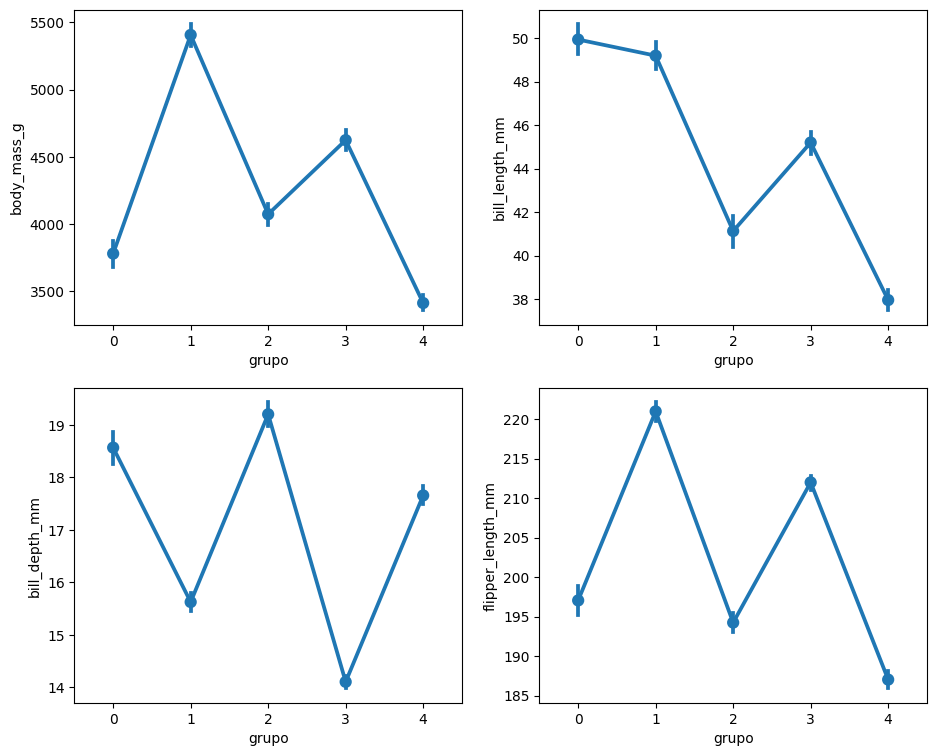

In [49]:
# criando um agrupamento com 5 grupos
cluster = AgglomerativeClustering(
    linkage = "complete", 
    distance_threshold = None, 
    compute_distances=True,
    n_clusters = 5 
)

# treinando o modelo
_ = cluster.fit(peng_pad)

# cópia da base
peng_cluster = peng_num.copy()

# adicionando o número dos grupos do Dataframe original
peng_cluster['grupo'] = cluster.labels_

# gerando o gráfico do peril das médias para 5 grupos
grafico_perfil_medias(peng_cluster)

<div style="background-color: #eafce3; padding: 8px 5px 8px 5px;">


Com o agrupamento em 5 grupos, podemos observar pelo gráfico acima que a única variável na qual 2 ou mais grupos se confundem é o comprimento do bico (bill_length_mm) entre os grupos 0 e 1.
    
<br>
    
Apesar dessa semelhança, todas as outras variáveis são distintas entre os grupos. Assim, se considerarmos essas 4 variáveis quantitativas em conjunto, temos um critério distinto de classificação entre os grupos.


    
</div>

**Quantos pinguins de cada espécie há em cada grupo?**

In [50]:
df2 = peng.merge(peng_cluster['grupo'], how='left', on='id')
pd.crosstab(df2['species'], df2['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


**Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?**

In [64]:
(
    df2[['grupo', 'species', 'sex']]
    .reset_index()
    .groupby(['species', 'grupo', 'sex'])
    .count()
    .reset_index()
    .rename(columns={"id": "quantidade"})
)

,species,grupo,sex,quantidade
0,Adelie,2.0,Female,4
1,Adelie,2.0,Male,55
2,Adelie,4.0,Female,69
3,Adelie,4.0,Male,18
4,Chinstrap,0.0,Female,20
5,Chinstrap,0.0,Male,34
6,Chinstrap,2.0,Female,9
7,Chinstrap,4.0,Female,5
8,Gentoo,1.0,Female,9
9,Gentoo,1.0,Male,61


**Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?**

<div style="background-color: #eafce3; padding: 8px 5px 8px 5px;">

Na minha opinião, não é possível afirmar que o novo agrupamento capturou algum novo padrão. Para isso, seria necessário também avaliar outras variáveis quantitativas e qualitativas que pudessem influenciar no agrupamento, como idade e localidade dos pinguins. 


    
</div>